In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import math
import cv2
print("done")

done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/Dataset"
classes = os.listdir(train_path)

classes

['cracked', 'not cracked']

In [ ]:
img_data=[]
img_labels=[]

total=1

for cls in classes:
  imgs = os.listdir(train_path+'/'+cls)
  counter=1
  for im in imgs:
    img_path=train_path+'/'+cls+"/"+im
    img=image.load_img(img_path,target_size=(224,224,3))
    img=image.img_to_array(img) 
    img_data.append(img)
    img_labels.append(cls)
    # print(counter)
    counter+=1
  total+=counter
  print(counter)


3727
1105


In [ ]:
x = np.asarray(img_data)
y = np.asarray(img_labels)
img_data = []
img_labels = []
x.shape,y.shape

((4830, 224, 224, 3), (4830,))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

# # Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x=0
y=0

CNN Model

In [ ]:
model = Sequential()
model.add(layers.Conv2D(16,3,activation='relu',input_shape =(224,224,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,3,activation = "relu",))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,3,activation = "relu",))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(128,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

3864
3864
966
966


Epoch 1/10
20/20 [==============================] - 10s 394ms/step - loss: 65.3035 - accuracy: 0.6962 - val_loss: 0.2794 - val_accuracy: 0.8986
Epoch 2/10
20/20 [==============================] - 6s 319ms/step - loss: 0.2357 - accuracy: 0.8986 - val_loss: 0.2077 - val_accuracy: 0.9120
Epoch 3/10
20/20 [==============================] - 6s 321ms/step - loss: 0.2050 - accuracy: 0.9244 - val_loss: 0.2387 - val_accuracy: 0.8354
Epoch 4/10
20/20 [==============================] - 6s 320ms/step - loss: 0.1941 - accuracy: 0.9257 - val_loss: 0.2037 - val_accuracy: 0.9337
Epoch 5/10
20/20 [==============================] - 6s 324ms/step - loss: 0.1570 - accuracy: 0.9356 - val_loss: 0.1639 - val_accuracy: 0.9306
Epoch 6/10
20/20 [==============================] - 6s 321ms/step - loss: 0.1422 - accuracy: 0.9532 - val_loss: 0.1945 - val_accuracy: 0.9379
Epoch 7/10
20/20 [==============================] - 6s 324ms/step - loss: 0.1293 - accuracy: 0.9557 - val_loss: 0.1625 - val_accuracy: 0.9503
Epoc

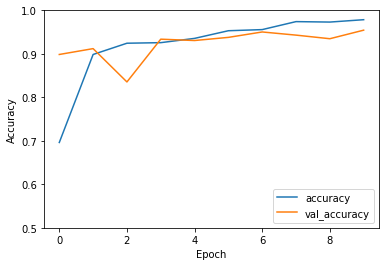

In [ ]:
history_Cnn = model.fit(x_train,y_train,epochs=10, batch_size=200,validation_data=(x_test,y_test))
plt.plot(history_Cnn.history['accuracy'], label='accuracy')
plt.plot(history_Cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('/content/drive/MyDrive/Epics models/CNN_model.h5')

In [ ]:
from keras.models import load_model
CNN_model = load_model('/content/drive/MyDrive/Epics models/CNN_model.h5')

In [ ]:
y_pred = np.argmax(CNN_model.predict(x_test),axis=-1)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


31/31 [==============================] - 1s 23ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9544513457556936

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       752
           1       0.90      0.90      0.90       214

    accuracy                           0.95       966
   macro avg       0.93      0.93      0.93       966
weighted avg       0.95      0.95      0.95       966



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[730  22]
 [ 22 192]]


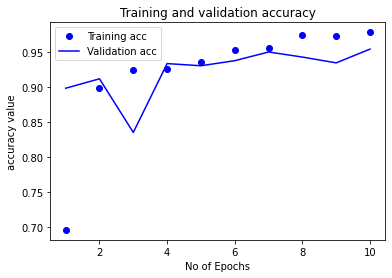

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_Cnn.history['accuracy']
val_acc = history_Cnn.history['val_accuracy']
loss = history_Cnn.history['loss']
val_loss = history_Cnn.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("accuracy value")
plt.legend()
plt.figure()
plt.show()

1/1 [==============================] - 0s 135ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Cracked


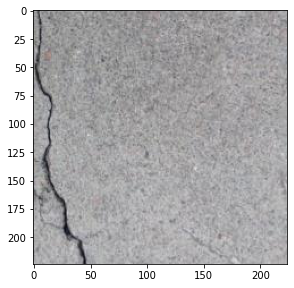

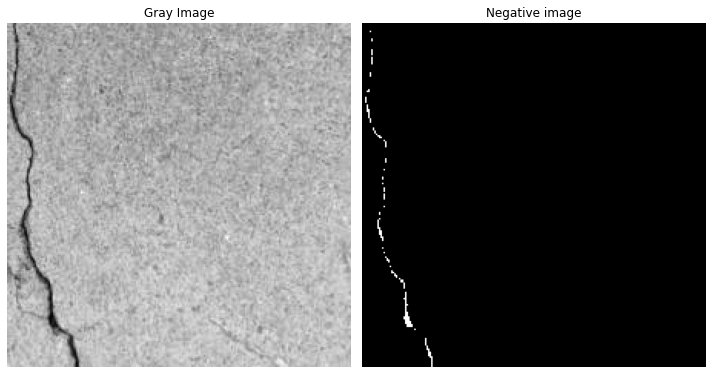

In [ ]:
img_path = "/content/drive/MyDrive/Dataset/cracked/4637.jpg"
size = plt.imread(img_path)
# for part in size:
test_image = image.load_img(img_path,target_size = (224,224,3))
original = plt.imread(img_path)
test_image = image.img_to_array(test_image)
# print("hello",test_image.shape)
test_image = np.expand_dims(test_image,axis = 0)
# print("hello",test_image.shape)
result = CNN_model.predict(test_image)
# print(result)
if result[0][0] >=0.5:
    prediction = 'Cracked'
else:
    prediction = 'Not cracked'
# print(prediction,result[0][0])
print(prediction)
# print(original)

fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(original)
original = np.expand_dims(original,axis = 0)
PrintImage(original)
# Binary_image(img_path)


VGG19 Model


In [ ]:
from keras.applications import VGG19
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import math
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image

In [ ]:
# Define the directory that contains your training images
train_dir = '/content/drive/MyDrive/Dataset'


# Define the batch size and image size for the training data
batch_size = 100
img_height, img_width = 224,224




In [ ]:
# Create a data generator that reads images from the training directory and preprocesses them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)



In [ ]:
# Generate the training data and labels
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')
# train_datagen = ImageDataGenerator(rescale=1./255)

# Generate the validation data and labels
val_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

x_train, y_train = train_generator.next()
x_val, y_val = val_generator.next()

Found 3865 images belonging to 2 classes.
Found 965 images belonging to 2 classes.


In [ ]:
# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))



80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
# Add a classifier on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
# Freeze all the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
# Train the model
history_vgg19 = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 30s 30s/step - loss: 0.8429 - accuracy: 0.2800 - val_loss: 0.4421 - val_accuracy: 0.8000
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.5734 - accuracy: 0.7200 - val_loss: 0.4989 - val_accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.6991 - accuracy: 0.7200 - val_loss: 0.4854 - val_accuracy: 0.8000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.6820 - accuracy: 0.7200 - val_loss: 0.4238 - val_accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.5803 - accuracy: 0.7200 - val_loss: 0.3788 - val_accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.4812 - accuracy: 0.7200 - val_loss: 0.4058 - val_accuracy: 0.8500
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.4574 - accuracy: 0.7400 - val_loss: 0.4761 - val_accuracy: 0.8800
Epoch 8/20
1/1 [==============================] - 

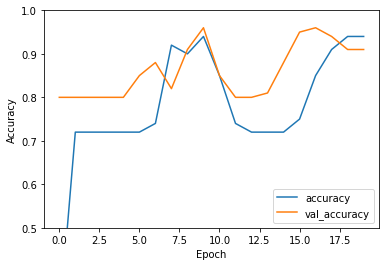

In [ ]:
plt.plot(history_vgg19.history['accuracy'], label='accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('/content/drive/MyDrive/Epics models/vgg19model.h5')

In [ ]:
x_train,y_train = 0,0

In [ ]:
from keras.models import load_model
model_vgg19=load_model('/content/drive/MyDrive/Epics models/vgg19model.h5')

In [ ]:
y_pred = np.argmax(model_vgg19.predict(x_val),axis=-1)

4/4 [==============================] - 4s 427ms/step


In [ ]:
#ACCURACY
y_true = np.argmax(y_val, axis=1)
np.mean(y_pred == y_true)

0.92

In [ ]:

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        80
           1       0.93      0.65      0.76        20

    accuracy                           0.92       100
   macro avg       0.92      0.82      0.86       100
weighted avg       0.92      0.92      0.91       100



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[79  1]
 [ 7 13]]


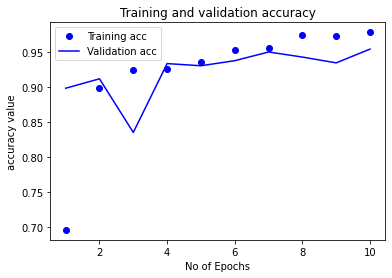

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_vgg19.history['accuracy']
val_acc = history_vgg19.history['val_accuracy']
loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("accuracy value")
plt.legend()
plt.figure()
plt.show()

In [ ]:

def PrintImage(Image_data):
  image = Image_data

  # Get image's dimensions
  value,width, height, channels = image.shape

  # Create a 2-d array i.e. an empty image(all zeros) of size width X height, i.e. only 2-d
  gray_image = np.uint8(np.zeros((width, height)))

  # convert BGR image into Gray image using prescribed values and fill values accordingly in the empty image
  for i in range(width):
      for j in range(height):
          gray_image[i, j] = (0.0722*image[0,i, j, 0] + 0.7152*image[0,i, j, 1] + 0.2126*image[0,i, j, 2])

  # initialize an empty image
  binary_image = np.uint8(np.zeros((width, height)))

  # fill values according the value of the pixel
  for i in range(width):
    for j in range(height):
      if(gray_image[i, j] >= 50):
        binary_image[i, j] = 0
      else:
        binary_image[i, j] = 255

  fig=plt.figure(figsize=(10, 10))
  columns = 2
  rows = 1

  fig.add_subplot(rows, columns, 1)
  plt.imshow(gray_image, "gray")
  plt.axis("off")
  plt.title("Gray Image")

  fig.add_subplot(rows, columns, 2)
  plt.imshow(binary_image,"gray")
  plt.axis("off")
  plt.title("Negative image")

  plt.tight_layout()
  plt.show()

In [ ]:
def Print_negative_image(image):
    value,width, height, channels = image.shape
    binary_image = np.uint8(np.zeros((width, height)))

    for i in range(width):
        for j in range(height):
          if((0.0722*image[0,i, j, 0] + 0.7152*image[0,i, j, 1] + 0.2126*image[0,i, j, 2]) >= 75):
            binary_image[i, j] = 0
          else:
            binary_image[i, j] = 255
            
    fig=plt.figure(figsize=(5, 5))
    columns = 1
    rows = 1
    fig.add_subplot(rows, columns, 2)
    plt.imshow(binary_image)
    plt.axis("off")
    plt.title("Negative image")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 693ms/step
Cracked


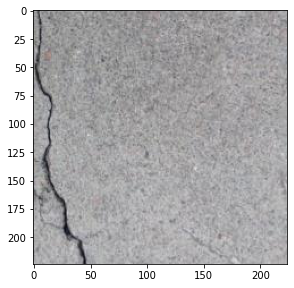

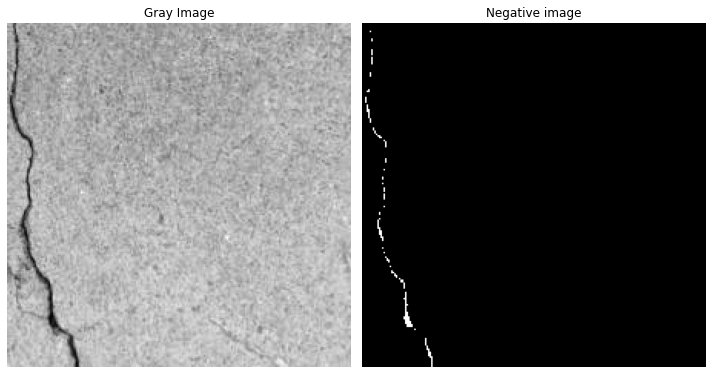

In [ ]:
img_path = "/content/drive/MyDrive/Dataset/cracked/4637.jpg"
size = plt.imread(img_path)

test_image = image.load_img(img_path,target_size = (224,224,3))
original = plt.imread(img_path)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model_vgg19.predict(test_image)

if result[0][0] >=0.5:
    prediction = 'Cracked'
else:
    prediction = 'Not cracked'
print(prediction)

fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(original)
original = np.expand_dims(original,axis = 0)
PrintImage(original)
